In [1]:
import acquire as ac
import prepare as pr

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os

# Superstore

In [2]:
df = ac.superstore()
df.head()

CSV File Found, Loading...


,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


## 1. Convert date column to datetime format.


In [3]:
df.sale_date

0         Tue, 01 Jan 2013 00:00:00 GMT
1         Wed, 02 Jan 2013 00:00:00 GMT
2         Thu, 03 Jan 2013 00:00:00 GMT
3         Fri, 04 Jan 2013 00:00:00 GMT
4         Sat, 05 Jan 2013 00:00:00 GMT
                      ...              
912995    Wed, 27 Dec 2017 00:00:00 GMT
912996    Thu, 28 Dec 2017 00:00:00 GMT
912997    Fri, 29 Dec 2017 00:00:00 GMT
912998    Sat, 30 Dec 2017 00:00:00 GMT
912999    Sun, 31 Dec 2017 00:00:00 GMT
Name: sale_date, Length: 913000, dtype: object

In [4]:
df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')
df.sale_date

0         Tue, 01 Jan 2013
1         Wed, 02 Jan 2013
2         Thu, 03 Jan 2013
3         Fri, 04 Jan 2013
4         Sat, 05 Jan 2013
                ...       
912995    Wed, 27 Dec 2017
912996    Thu, 28 Dec 2017
912997    Fri, 29 Dec 2017
912998    Sat, 30 Dec 2017
912999    Sun, 31 Dec 2017
Name: sale_date, Length: 913000, dtype: object

In [5]:
df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y') 
df.sale_date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

## 2. Plot the distribution of sale_amount and item_price.


item


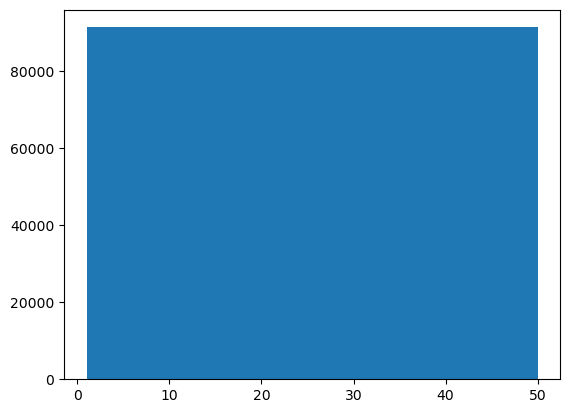

sale_amount


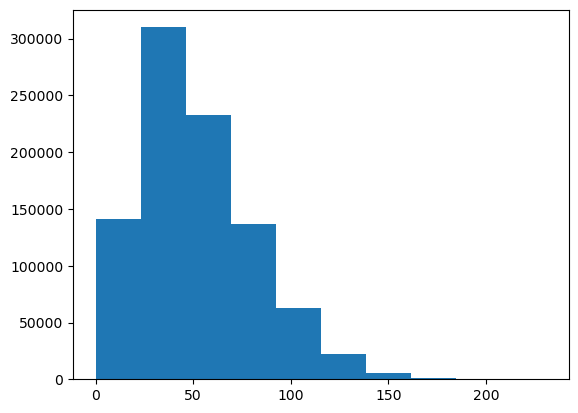

sale_date


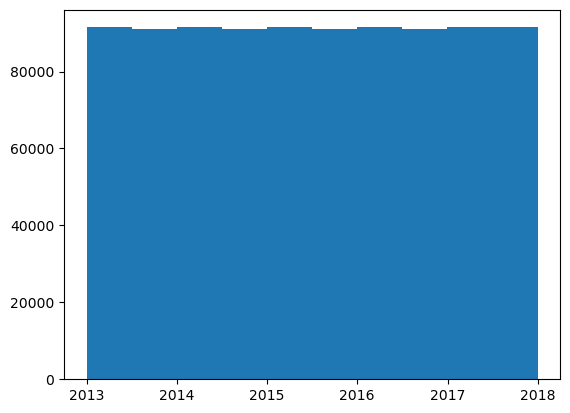

sale_id


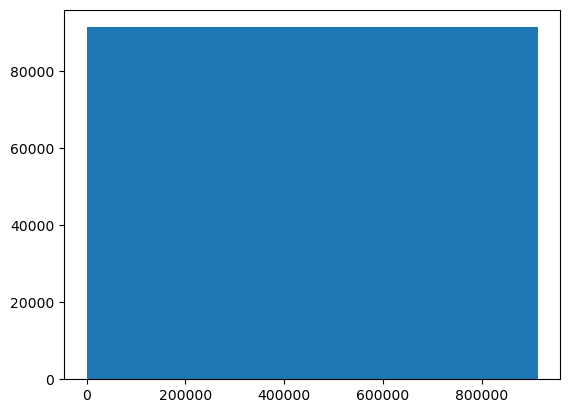

store


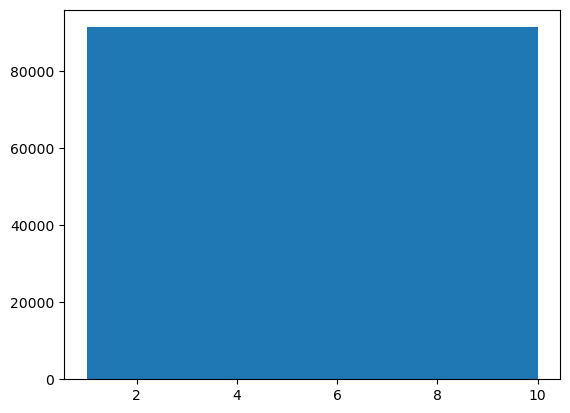

item_brand


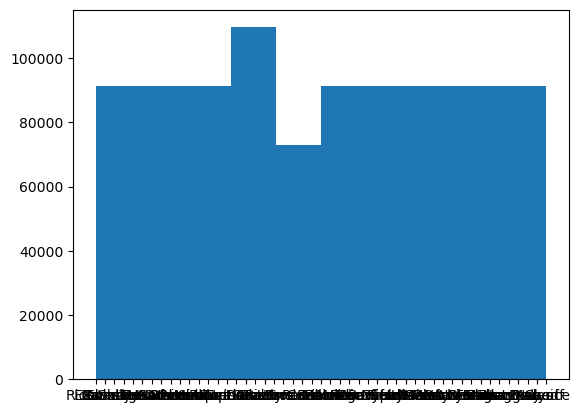

item_id


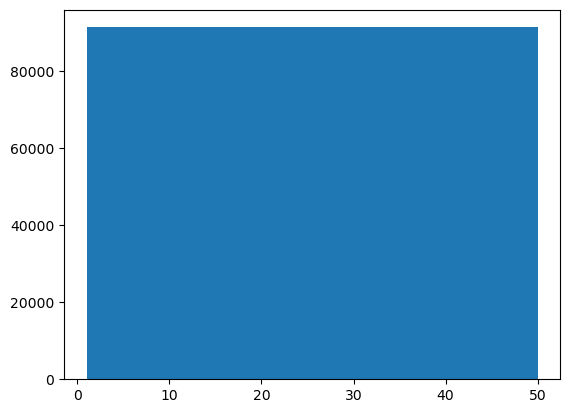

item_name


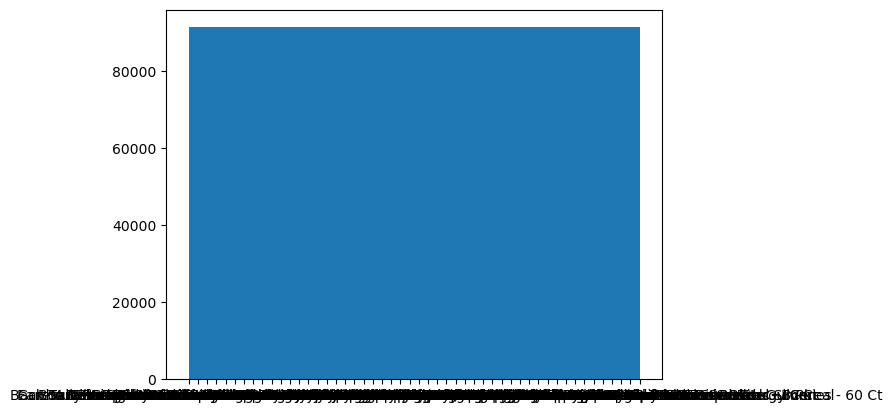

item_price


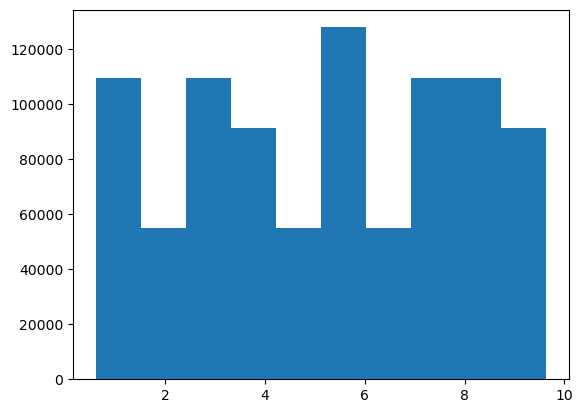

item_upc12


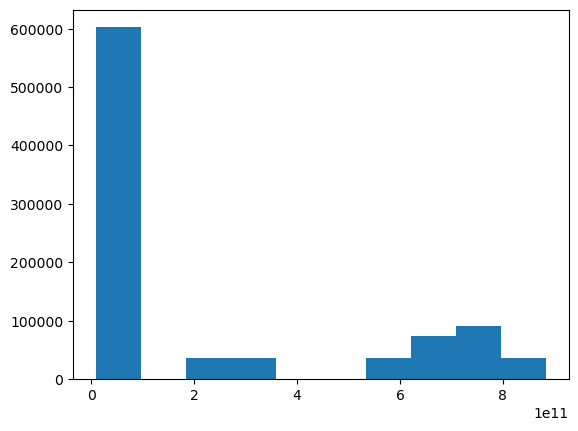

item_upc14


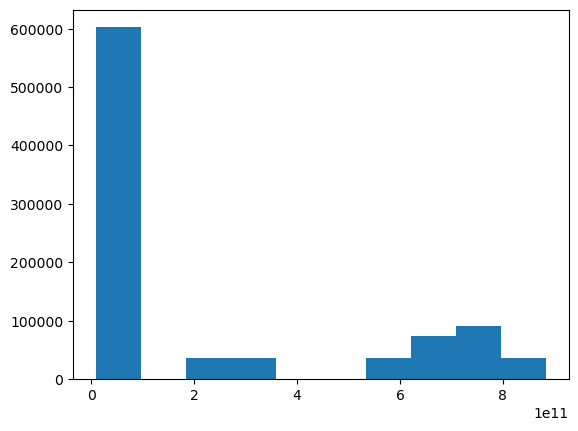

store_address


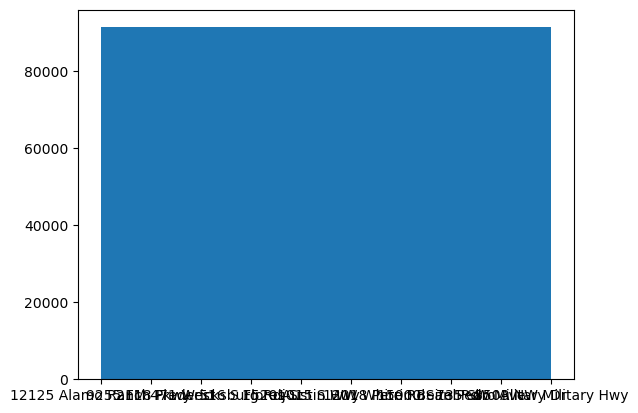

store_city


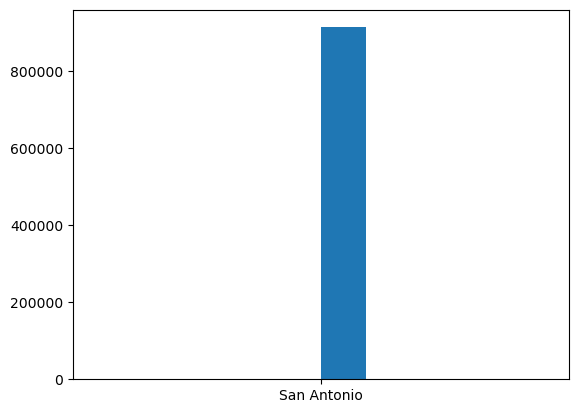

store_id


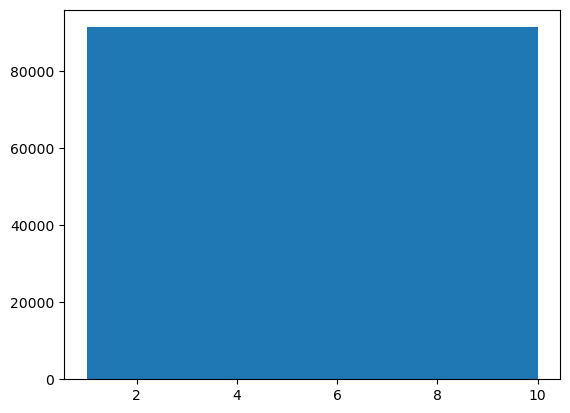

store_state


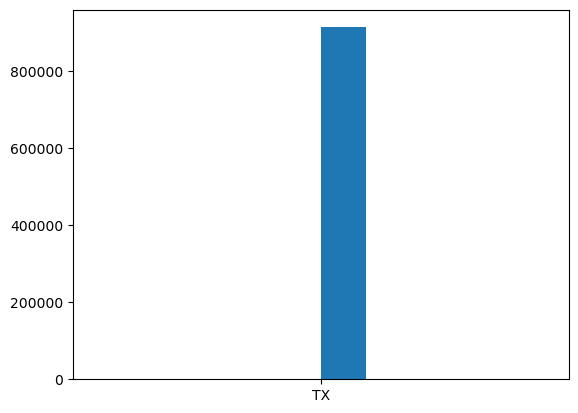

store_zipcode


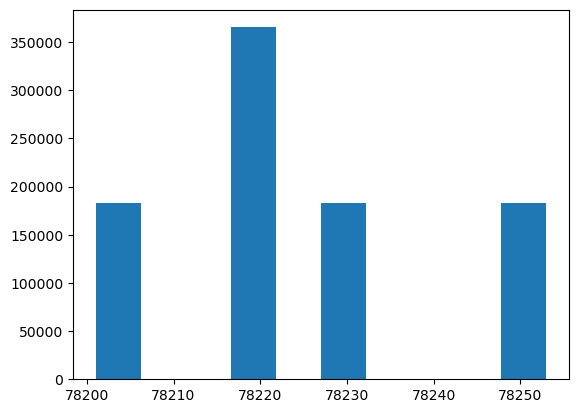

In [6]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.show()

## 3. Set the index to be the datetime variable.


In [7]:
df = df.set_index(df.sale_date).sort_index()
df.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,2013-01-01,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,17,26.0,2013-01-01,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,7,32.0,2013-01-01,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01,18,45.0,2013-01-01,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,19,34.0,2013-01-01,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


## 4. Add a 'month' and 'day of week' column to your dataframe.


In [8]:
df['month'] = df.index.month_name()
df.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,2013-01-01,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January
2013-01-01,17,26.0,2013-01-01,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January
2013-01-01,7,32.0,2013-01-01,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,January
2013-01-01,18,45.0,2013-01-01,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January
2013-01-01,19,34.0,2013-01-01,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January


In [9]:
df['weekday'] = df.index.day_name()
df.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,weekday
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,2013-01-01,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday
2013-01-01,17,26.0,2013-01-01,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday
2013-01-01,7,32.0,2013-01-01,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,January,Tuesday
2013-01-01,18,45.0,2013-01-01,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday
2013-01-01,19,34.0,2013-01-01,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday


## 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [10]:
df['sales_total'] = df.sale_amount * df.item_price
df.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,2013-01-01,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01,17,26.0,2013-01-01,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,30.16
2013-01-01,7,32.0,2013-01-01,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,January,Tuesday,308.48
2013-01-01,18,45.0,2013-01-01,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,197.55
2013-01-01,19,34.0,2013-01-01,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,25.16


#### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [11]:
df = ac.superstore()
df.head()

CSV File Found, Loading...


,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [12]:
df = pr.prep_superstore(df)
df.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,2013-01-01,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01,17,26.0,2013-01-01,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,30.16
2013-01-01,7,32.0,2013-01-01,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,January,Tuesday,308.48
2013-01-01,18,45.0,2013-01-01,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,197.55
2013-01-01,19,34.0,2013-01-01,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,25.16


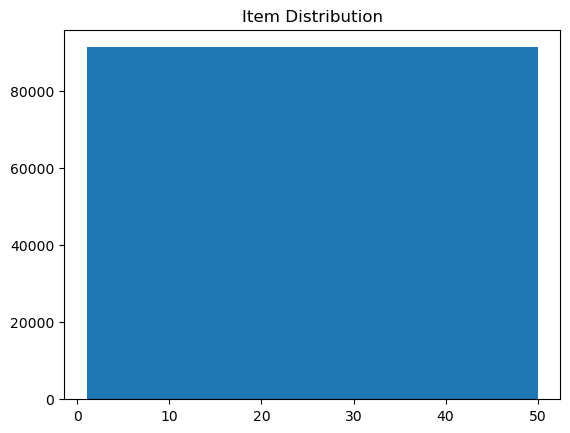

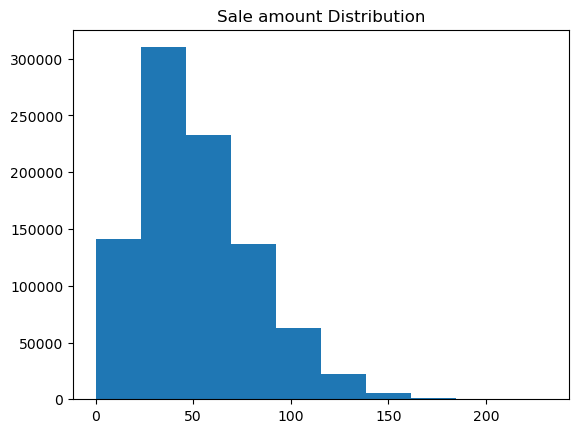

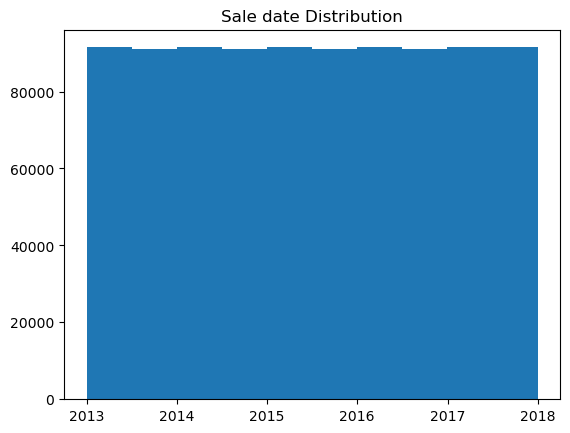

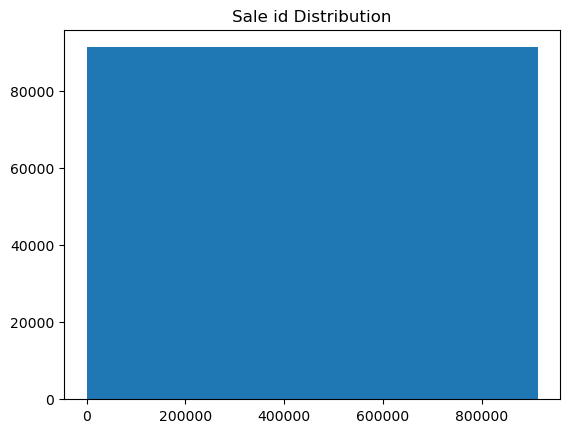

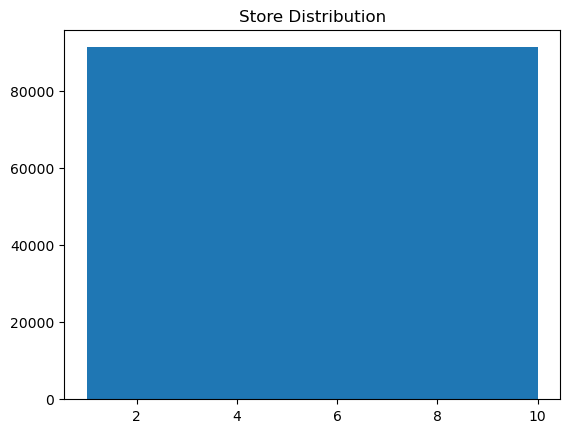

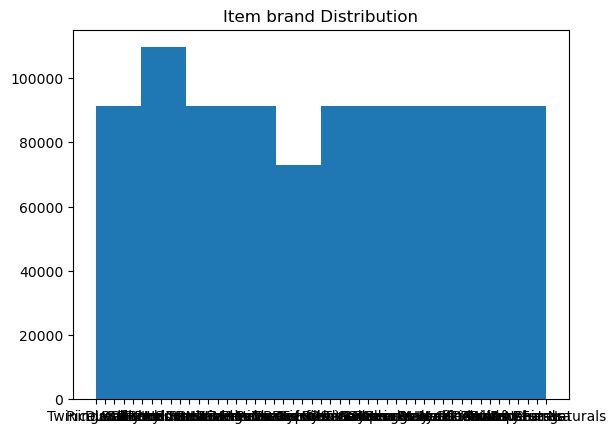

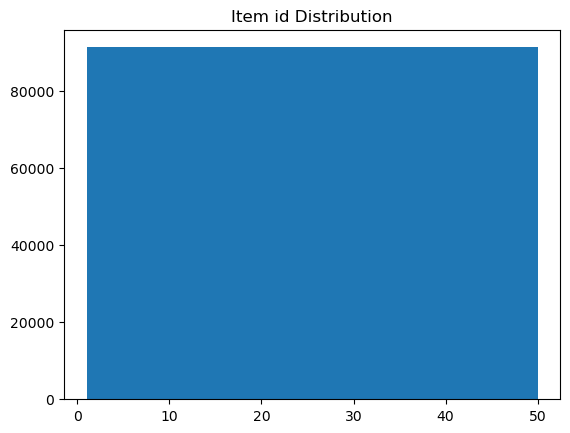

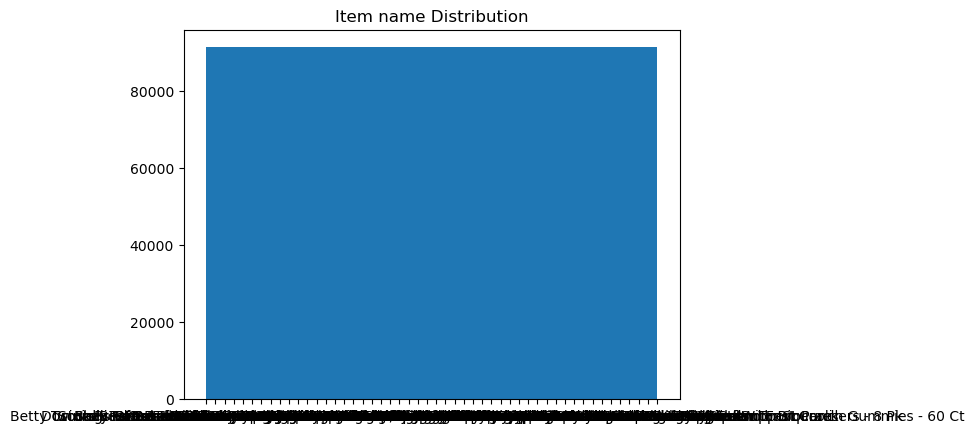

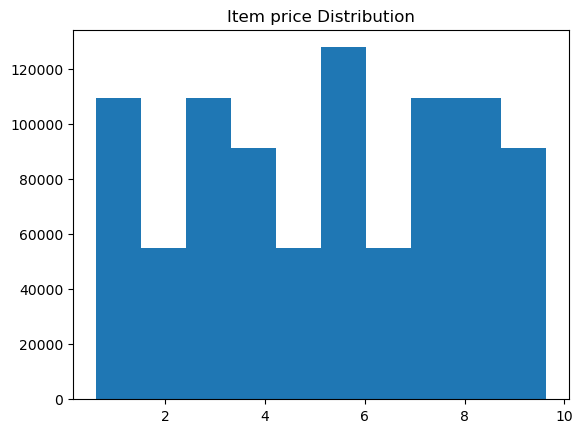

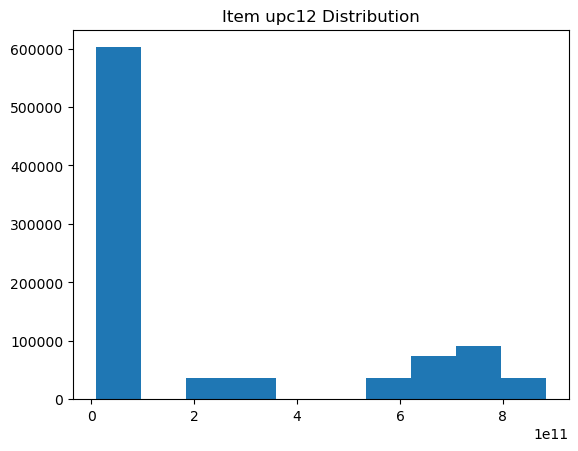

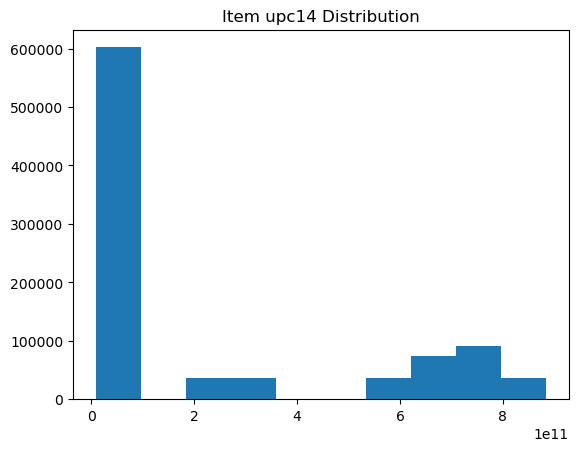

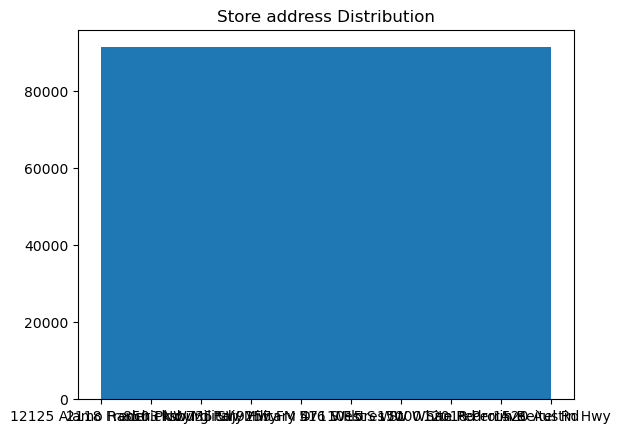

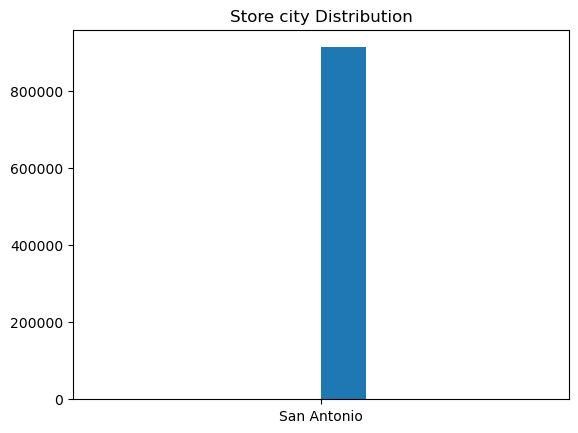

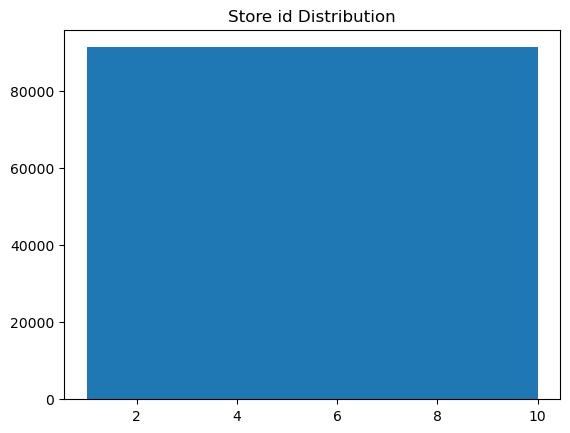

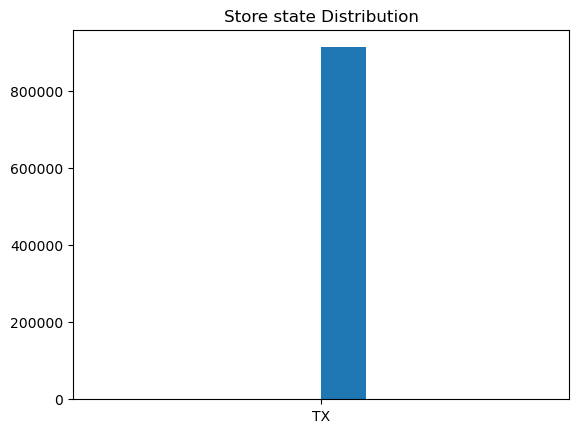

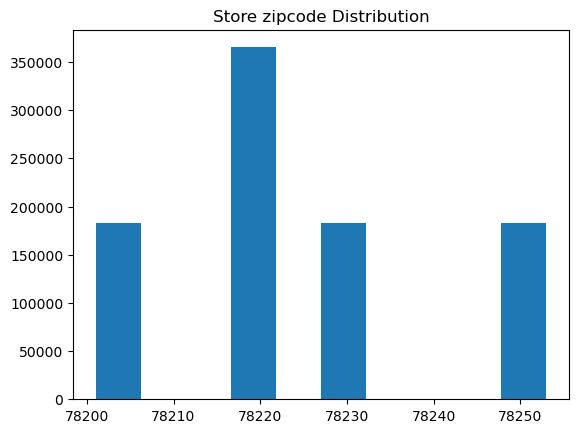

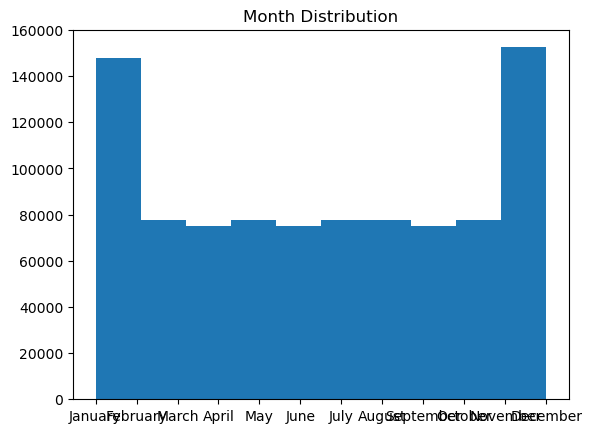

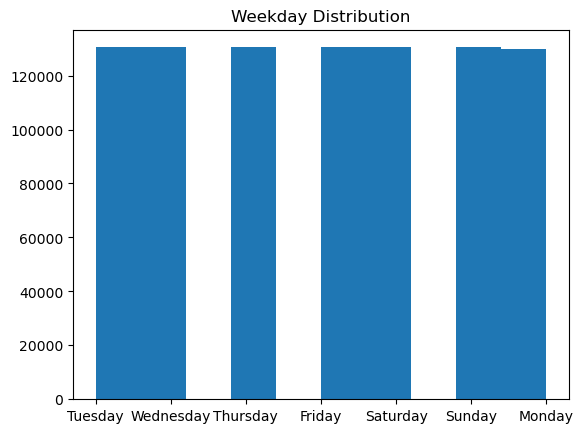

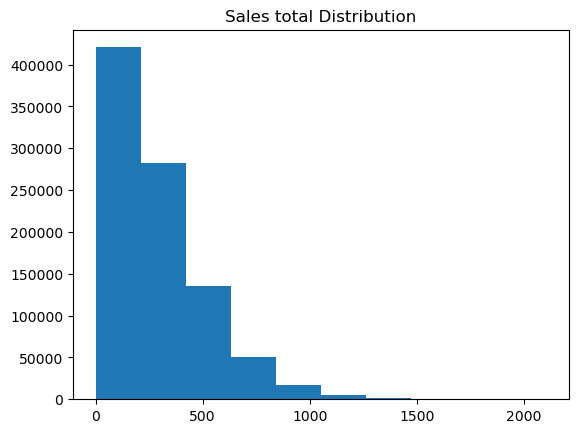

In [13]:
pr.dist_plot(df)

# Germany Energy

In [14]:
df = ac.germany_energy()
df.head()

CSV File Found, Loading...


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [15]:
df.columns = df.columns.str.lower()
df.head()

,consumption,wind,solar,wind+solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [16]:
df.rename(columns={'wind+solar':'wind_and_solar'}, inplace=True)

In [17]:
df.head()

,consumption,wind,solar,wind_and_solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


## 1. Convert date column to datetime format.


In [18]:
df['date'] = df.index
df.head()

,consumption,wind,solar,wind_and_solar,date
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006-01-01
2006-01-02,1380.521,NaN,NaN,NaN,2006-01-02
2006-01-03,1442.533,NaN,NaN,NaN,2006-01-03
2006-01-04,1457.217,NaN,NaN,NaN,2006-01-04
2006-01-05,1477.131,NaN,NaN,NaN,2006-01-05


In [19]:
df.date = pd.to_datetime(df.date)

## 2. Plot the distribution of each of your variables.


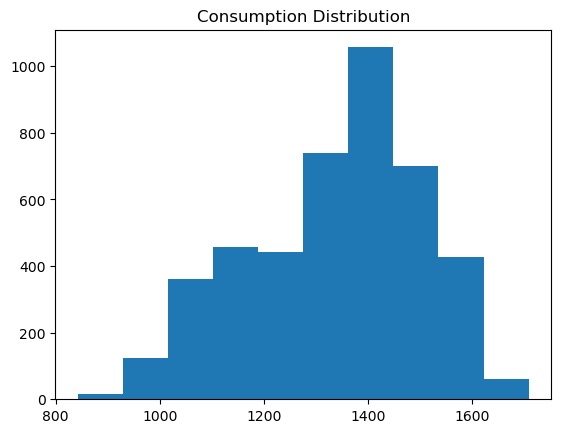

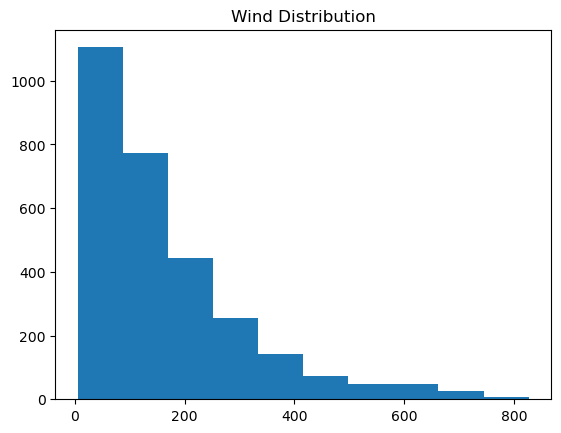

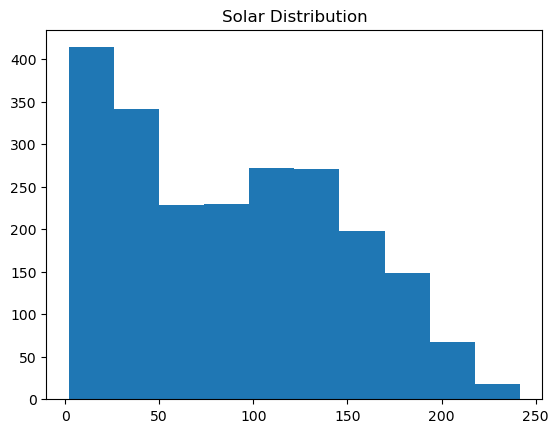

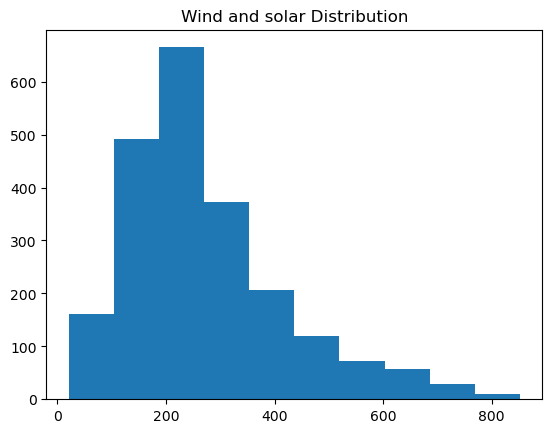

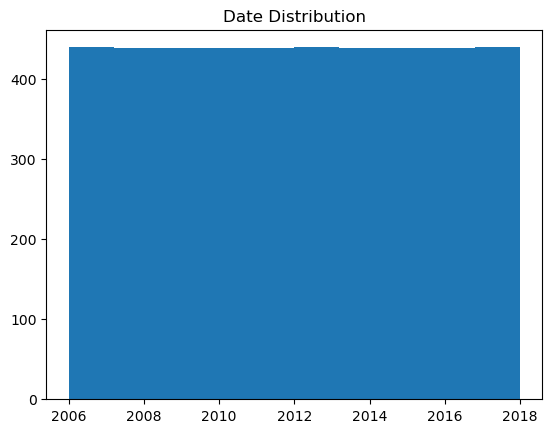

In [20]:
pr.dist_plot(df)

## 3. Set the index to be the datetime variable.


In [21]:
df = df.set_index(df.date).sort_index()

In [22]:
df = df.drop(columns='date')
df

,consumption,wind,solar,wind_and_solar
date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


## 4. Add a month and a year column to your dataframe.


In [23]:
df['month'] = df.index.month_name()
df.head()

,consumption,wind,solar,wind_and_solar,month
date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January
2006-01-02,1380.521,NaN,NaN,NaN,January
2006-01-03,1442.533,NaN,NaN,NaN,January
2006-01-04,1457.217,NaN,NaN,NaN,January
2006-01-05,1477.131,NaN,NaN,NaN,January


In [24]:
df['year'] = df.index.year
df.head()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


## 5. Fill any missing values.


In [25]:
df.shape

(4383, 6)

In [26]:
df.isnull().sum()

consumption          0
wind              1463
solar             2195
wind_and_solar    2196
month                0
year                 0
dtype: int64

In [27]:
df.index.min()

Timestamp('2006-01-01 00:00:00')

In [28]:
df.index.max()

Timestamp('2017-12-31 00:00:00')

In [29]:
df.index.max() - df.index.min() + pd.Timedelta('1d')

Timedelta('4383 days 00:00:00')

In [30]:
df.wind.mean()

164.8141726027395

In [31]:
df.wind.min(), df.wind.max()

(5.756999999999999, 826.2779999999999)

In [32]:
df.solar.min(), df.solar.max()

(1.968, 241.58)

In [33]:
df.wind = df.wind.fillna(df.wind.min())

In [34]:
df.solar = df.solar.fillna(df.solar.min())

In [35]:
df.wind_and_solar = df.wind_and_solar.fillna(df.wind+df.solar)

In [36]:
df.head()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.184,5.757,1.968,7.725,January,2006
2006-01-02,1380.521,5.757,1.968,7.725,January,2006
2006-01-03,1442.533,5.757,1.968,7.725,January,2006
2006-01-04,1457.217,5.757,1.968,7.725,January,2006
2006-01-05,1477.131,5.757,1.968,7.725,January,2006


In [37]:
# i filled the na values for wind and solar with the min because germany 
# has been producing these power options since 2000. This df starts in 2006.
# Then I filled the NA values in wind and solar with just adding the columns together

# I could not justify using the mean because the range is too vast. however, I can justify
# using the min value because the sun exists and there's always a breeze in germany.

#### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [38]:
df = ac.germany_energy()
df.head()

CSV File Found, Loading...


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [39]:
df = pr.prep_germany(df)
df.head()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.184,5.757,1.968,7.725,January,2006
2006-01-02,1380.521,5.757,1.968,7.725,January,2006
2006-01-03,1442.533,5.757,1.968,7.725,January,2006
2006-01-04,1457.217,5.757,1.968,7.725,January,2006
2006-01-05,1477.131,5.757,1.968,7.725,January,2006


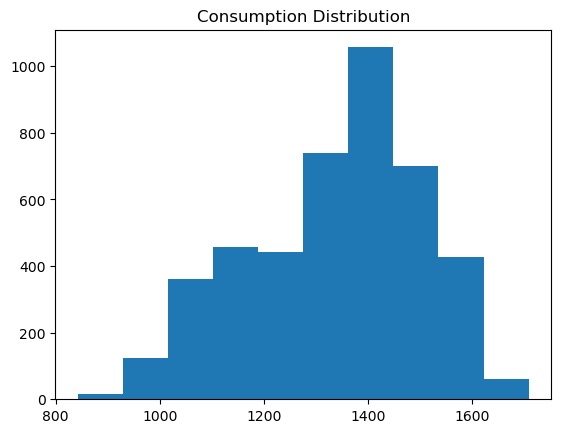

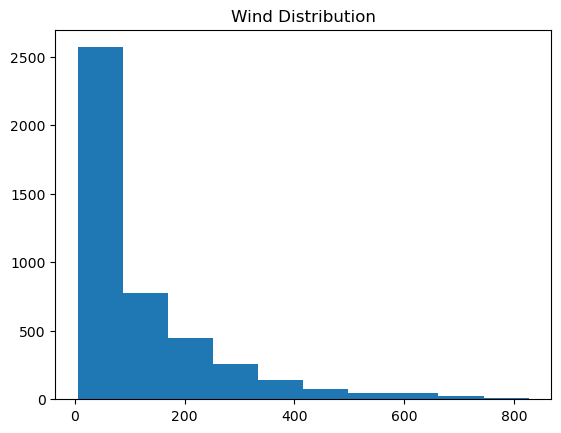

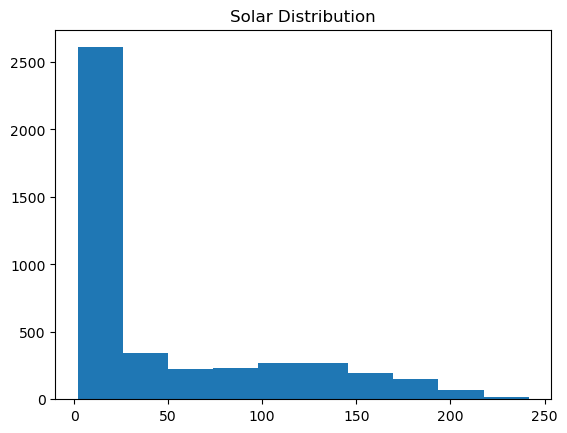

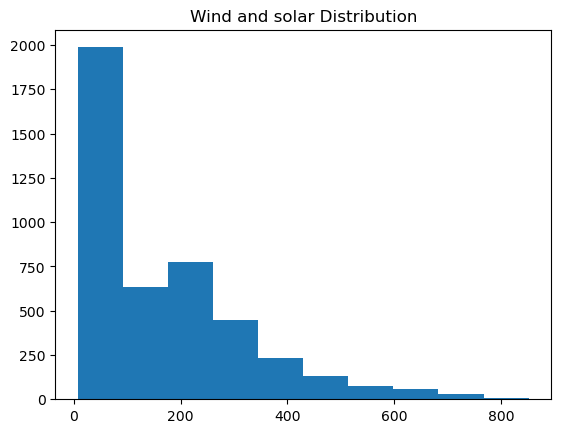

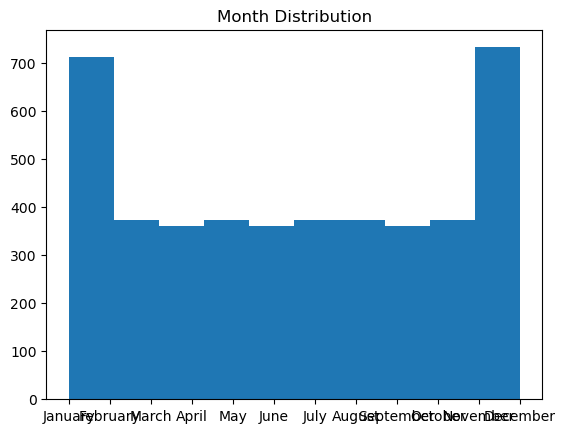

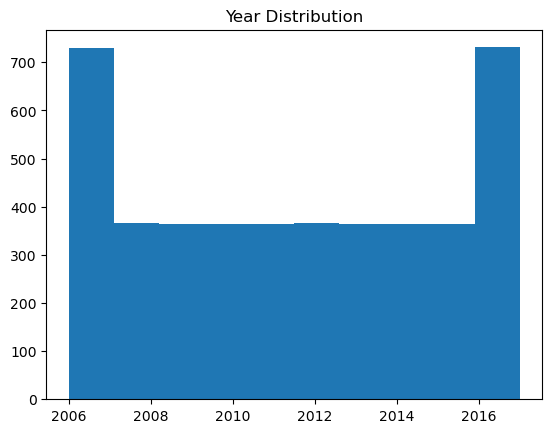

In [40]:
pr.dist_plot(df)

In [57]:
df['pct_renewable'] = ((df.wind_and_solar/df.consumption)).round(2)
df.drop(columns='pct_other', inplace=True)
df

,consumption,wind,solar,wind_and_solar,month,year,pct_renewable
date,,,,,,,
2006-01-01,1069.18400,5.757,1.968,7.725,January,2006,0.01
2006-01-02,1380.52100,5.757,1.968,7.725,January,2006,0.01
2006-01-03,1442.53300,5.757,1.968,7.725,January,2006,0.01
2006-01-04,1457.21700,5.757,1.968,7.725,January,2006,0.01
2006-01-05,1477.13100,5.757,1.968,7.725,January,2006,0.01
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017,0.33
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017,0.40
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017,0.47


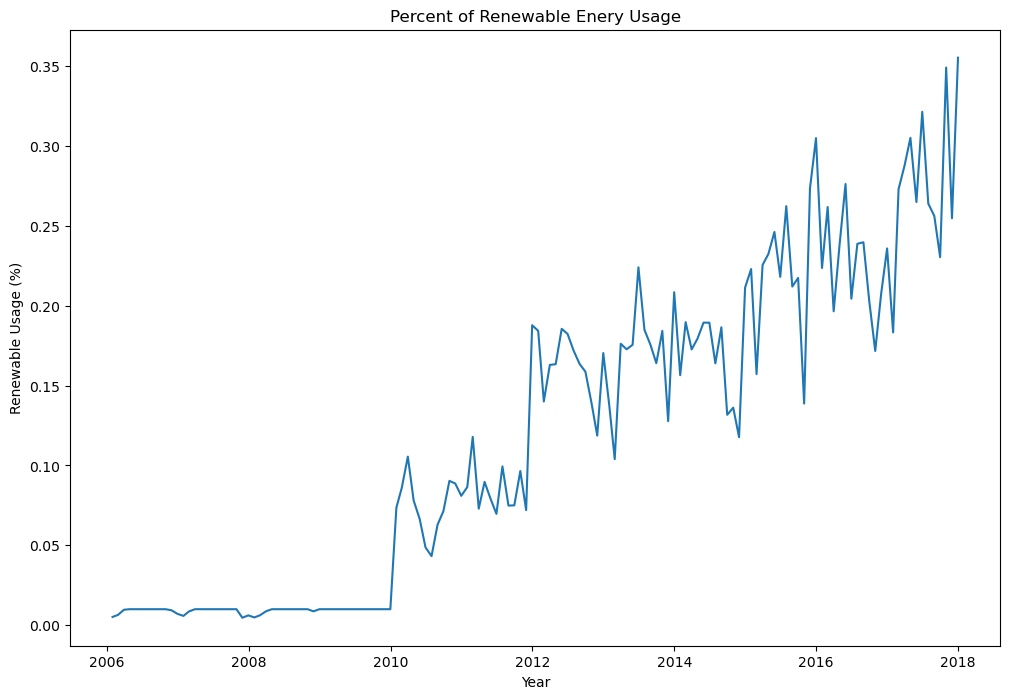

In [60]:
plt.figure(figsize=(12,8))
plt.plot(df.resample('M').pct_renewable.mean())
plt.title('Percent of Renewable Enery Usage')
plt.ylabel('Renewable Usage (%)')
plt.xlabel('Year')
plt.show()